In [1]:
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.compose import TransformedTargetRegressor
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
import datetime
from datetime import timedelta
import ast
import json    
import missingno as msno

In [2]:
df = pd.read_csv('../data/aqar.csv')

In [3]:
df.shape

(6762, 34)

0   &emsp; 5059 <br>
2    &emsp; 394<br>
4    &emsp; 350<br>
1    &emsp; 282<br>
5   &emsp;  261<br>
3  &emsp;   184<br>
6   &emsp;  117<br>
7   &emsp;  115<br>
<br>
each day indicate how many apartment sold 0 means not sold <br>
1 means sold in day 7/8/2022<br>
2 means sold in day 8/8/2022 <br>
...         ...     ...<br>
7 means sold in day 12/8/2022<br>
<br>
i would like to say that i have the data in 1st , 2nd and 3rd of this month but i don't have the data in the 4th and 5th of this month so i started in the 6th 
<br>
1/8  i have <br>
2/8  i have <br>
3/8  i have <br>
4/8  i don't have <br>
5/8  i don't have <br>
6/8  i have <br>
7/8  i have <br>
8/8  i have <br>
9/8  i have <br>
10/8 i have <br>
11/8 i have <br>
12/8 i have  <br>
13/8 i have  <br>
...

and now i think that i need the time it took to be sold so i create soldAt which give us how many time from publishing the post till it got sold (did this in file called updateDate)

In [4]:
df['soldAt'].value_counts()

0      4646
6        88
10       85
8        77
9        74
       ... 
138       1
331       1
102       1
104       1
202       1
Name: soldAt, Length: 136, dtype: int64

and for in each day how many post is sold (did this in join file)

In [5]:
df['sold'].value_counts()

0    4646
2     394
4     350
1     282
5     261
8     245
3     184
9     168
6     117
7     115
Name: sold, dtype: int64

i would like to mintion that in file called check i checked how many post are there from the begining of this month this will help me in the classifcation model here i would like to create i regression model that how long it will take to git sold if it is going to be sold

In [6]:
df.isnull().sum() 

Unnamed: 0.1          0
Unnamed: 0            0
user_id               0
id                    0
title                 0
price                 0
content              94
imgs                643
refresh               0
beds                  0
livings               2
wc                    0
area                175
street_width        210
age                 705
last_update           0
ketchen              17
ac                   19
furnished            45
location              0
path                  0
user                  0
district              0
width              2100
length             2100
advertiser_type     240
create_time           0
review              399
profileImg         2746
UserName             93
iam_verified        146
rega_id               0
sold                  0
soldAt                0
dtype: int64

In [8]:
df['ac'].value_counts()

1.0    4871
0.0    1872
Name: ac, dtype: int64

<AxesSubplot:>

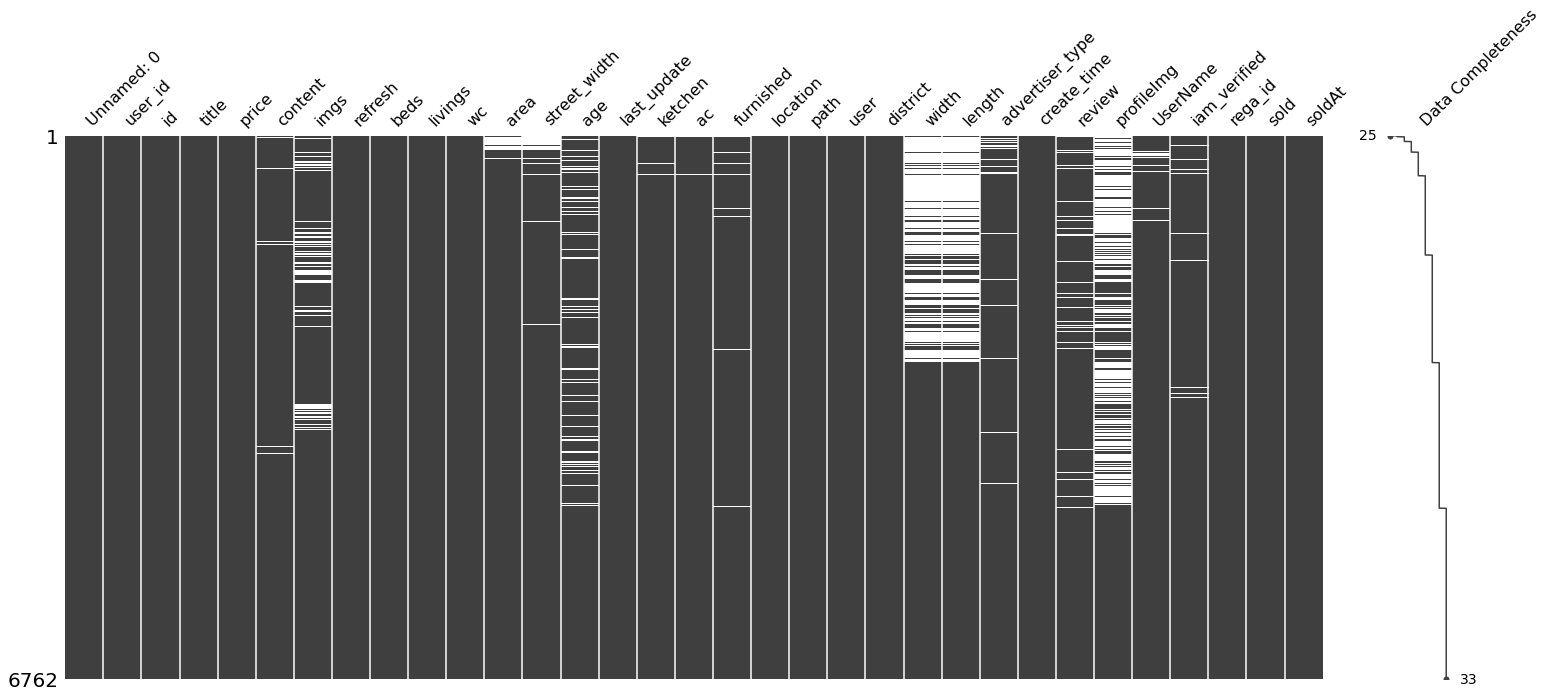

In [9]:
msno.matrix(df, labels=True, filter="bottom", sort="ascending", n=50)